## Chapter 7 Code - Python 3 version

### abaloneGBM.py

MSE
4.260447821913919
1775


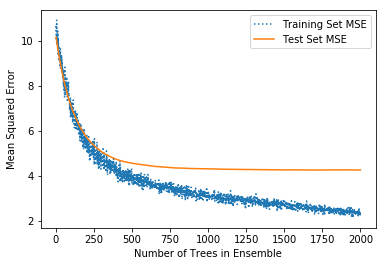

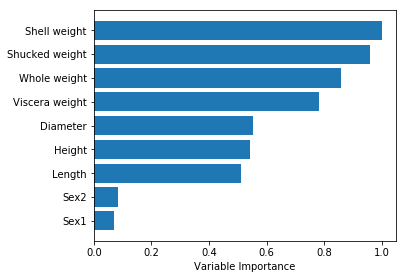

In [2]:
__author__ = 'mike_bowles'

import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
import numpy
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []
for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

#list of names for
abaloneNames = numpy.array(['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                            'Viscera weight', 'Shell weight', 'Rings'])

#number of rows and columns in x matrix
nrows = len(xCoded)
ncols = len(xCoded[1])

#form x and y into numpy arrays and make up column names
X = numpy.array(xCoded)
y = numpy.array(labels)

#break into training and test sets.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

#instantiate model
nEst = 2000
depth = 5
learnRate = 0.005
maxFeatures = 3
subsamp = 0.5
abaloneGBMModel = ensemble.GradientBoostingRegressor(n_estimators=nEst, max_depth=depth, 
                                                     learning_rate=learnRate, max_features=maxFeatures,
                                                     subsample=subsamp, loss='ls')

#train
abaloneGBMModel.fit(xTrain, yTrain)

# compute mse on test set
msError = []
predictions = abaloneGBMModel.staged_predict(xTest)
for p in predictions:
    msError.append(mean_squared_error(yTest, p))

print("MSE" )
print(min(msError))
print(msError.index(min(msError)))

#plot training and test errors vs number of trees in ensemble
plot.figure()
plot.plot(range(1, nEst + 1), abaloneGBMModel.train_score_, label='Training Set MSE', linestyle=":")
plot.plot(range(1, nEst + 1), msError, label='Test Set MSE')
plot.legend(loc='upper right')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
plot.show()

# Plot feature importance
featureImportance = abaloneGBMModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()
idxSorted = numpy.argsort(featureImportance)
barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, abaloneNames[idxSorted])
plot.xlabel('Variable Importance')
plot.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plot.show()

# Printed Output:

# for Gradient Boosting
# nEst = 2000
# depth = 5
# learnRate = 0.003
# maxFeatures = None
# subsamp = 0.5
#
# MSE
# 4.22969363284
# 1736

#for Gradient Boosting with RF base learners
# nEst = 2000
# depth = 5
# learnRate = 0.005
# maxFeatures = 3
# subsamp = 0.5
#
# MSE
# 4.27564515749
# 1687

### abaloneRF.py

MSE
4.300814944862819


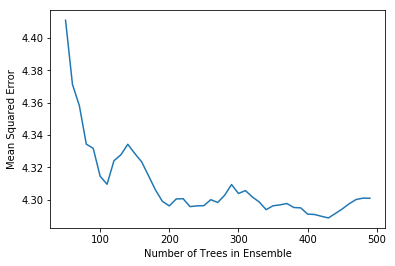

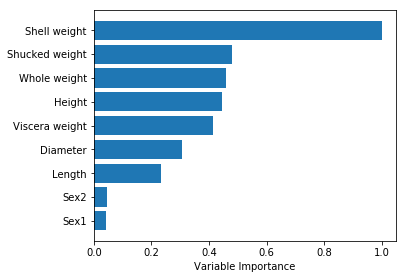

In [3]:
__author__ = 'mike_bowles'

import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
import numpy
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error


target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []
for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

#list of names for
abaloneNames = numpy.array(['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                            'Viscera weight', 'Shell weight', 'Rings'])

#number of rows and columns in x matrix
nrows = len(xCoded)
ncols = len(xCoded[1])

#form x and y into numpy arrays and make up column names
X = numpy.array(xCoded)
y = numpy.array(labels)

#break into training and test sets.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

#train random forest at a range of ensemble sizes in order to see how the mse changes
mseOos = []
nTreeList = range(50, 500, 10)
for iTrees in nTreeList:
    depth = None
    maxFeat  = 4 #try tweaking
    abaloneRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees, max_depth=depth, max_features=maxFeat,
                                                 oob_score=False, random_state=531)

    abaloneRFModel.fit(xTrain,yTrain)

    #Accumulate mse on test set
    prediction = abaloneRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))


print("MSE" )
print(mseOos[-1])


#plot training and test errors vs number of trees in ensemble
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

# Plot feature importance
featureImportance = abaloneRFModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()
sortedIdx = numpy.argsort(featureImportance)
barPos = numpy.arange(sortedIdx.shape[0]) + .5
plot.barh(barPos, featureImportance[sortedIdx], align='center')
plot.yticks(barPos, abaloneNames[sortedIdx])
plot.xlabel('Variable Importance')
plot.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plot.show()

# Printed Output:
# MSE
# 4.30971555911

### glassGbm.py

Best Missclassification Error
0.22727272727272727
Number of Trees for Best Missclassification Error
254


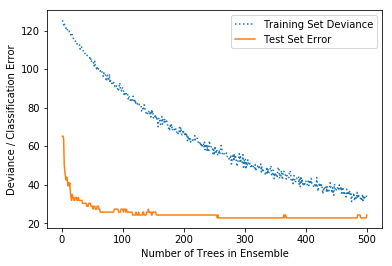

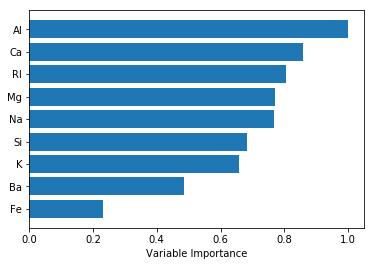


Confusion Matrix
[[20  1  0  0  0  0]
 [ 2 21  0  0  0  0]
 [ 4  2  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  0  0  3  0]
 [ 0  2  0  0  0  7]]


In [4]:
__author__ = 'mike_bowles'

import urllib.request, urllib.error, urllib.parse
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.linear_model import enet_path
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
import numpy


target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
for line in data:
    #split on comma
    row = line.decode().strip().split(",")
    xList.append(row)

glassNames = numpy.array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

#Separate attributes and labels
xNum = []
labels = []

for row in xList:
    labels.append(row.pop())
    l = len(row)
    #eliminate ID
    attrRow = [float(row[i]) for i in range(1, l)]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrows = len(xNum)
ncols = len(xNum[1])

#Labels are integers from 1 to 7 with no examples of 4.
#gb requires consecutive integers starting at 0
newLabels = []
labelSet = set(labels)
labelList = list(labelSet)
labelList.sort()
nlabels = len(labelList)
for l in labels:
    index = labelList.index(l)
    newLabels.append(index)

#Class populations:
#old label     new label     num of examples
#1              0               70
#2              1               76
#3              2               17
#5              3               13
#6              4               9
#7              5               29
#
#Drawing 30% test sample may not preserve population proportions

#stratified sampling by labels.
xTemp = [xNum[i] for i in range(nrows) if newLabels[i] == 0]
yTemp = [newLabels[i] for i in range(nrows) if newLabels[i] == 0]
xTrain, xTest, yTrain, yTest = train_test_split(xTemp, yTemp, test_size=0.30, random_state=531)
for iLabel in range(1, len(labelList)):
    #segregate x and y according to labels
    xTemp = [xNum[i] for i in range(nrows) if newLabels[i] == iLabel]
    yTemp = [newLabels[i] for i in range(nrows) if newLabels[i] == iLabel]

    #form train and test sets on segregated subset of examples
    xTrainTemp, xTestTemp, yTrainTemp, yTestTemp = train_test_split(xTemp, yTemp, test_size=0.30, random_state=531)

    #accumulate
    xTrain = numpy.append(xTrain, xTrainTemp, axis=0); xTest = numpy.append(xTest, xTestTemp, axis=0)
    yTrain = numpy.append(yTrain, yTrainTemp, axis=0); yTest = numpy.append(yTest, yTestTemp, axis=0)

#instantiate model
nEst = 500
depth = 3
learnRate = 0.003
maxFeatures = 3
subSamp = 0.5
glassGBMModel = ensemble.GradientBoostingClassifier(n_estimators=nEst, max_depth=depth,
                                                         learning_rate=learnRate, max_features=maxFeatures,
                                                         subsample=subSamp)

#train
glassGBMModel.fit(xTrain, yTrain)

# compute auc on test set as function of ensemble size
missClassError = []
missClassBest = 1.0
predictions = glassGBMModel.staged_decision_function(xTest)
for p in predictions:
    missClass = 0
    for i in range(len(p)):
        listP = p[i].tolist()
        if listP.index(max(listP)) != yTest[i]:
            missClass += 1
    missClass = float(missClass)/len(p)

    missClassError.append(missClass)

    #capture best predictions
    if missClass < missClassBest:
        missClassBest = missClass
        pBest = p

idxBest = missClassError.index(min(missClassError))

#print best values
print("Best Missclassification Error" )
print(missClassBest)
print("Number of Trees for Best Missclassification Error")
print(idxBest)

#plot training deviance and test auc's vs number of trees in ensemble
missClassError = [100*mce for mce in missClassError]
plot.figure()
plot.plot(range(1, nEst + 1), glassGBMModel.train_score_, label='Training Set Deviance', linestyle=":")
plot.plot(range(1, nEst + 1), missClassError, label='Test Set Error')
plot.legend(loc='upper right')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Deviance / Classification Error')
plot.show()

# Plot feature importance
featureImportance = glassGBMModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()

#plot variable importance
idxSorted = numpy.argsort(featureImportance)
barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, glassNames[idxSorted])
plot.xlabel('Variable Importance')
plot.show()

#generate confusion matrix for best prediction.
pBestList = pBest.tolist()
bestPrediction = [r.index(max(r)) for r in pBestList]
confusionMat = confusion_matrix(yTest, bestPrediction)
print('')
print("Confusion Matrix")
print(confusionMat)


# Printed Output:
#
# nEst = 500
# depth = 3
# learnRate = 0.003
# maxFeatures = None
# subSamp = 0.5
#
#
# Best Missclassification Error
# 0.242424242424
# Number of Trees for Best Missclassification Error
# 113
#
# Confusion Matrix
# [[19  1  0  0  0  1]
#  [ 3 19  0  1  0  0]
#  [ 4  1  0  0  1  0]
#  [ 0  3  0  1  0  0]
#  [ 0  0  0  0  3  0]
#  [ 0  1  0  1  0  7]]
#



# For gradient boosting using random forest base learners
# nEst = 500
# depth = 3
# learnRate = 0.003
# maxFeatures = 3
# subSamp = 0.5
#
#
#
# Best Missclassification Error
# 0.227272727273
# Number of Trees for Best Missclassification Error
# 267
#
# Confusion Matrix
# [[20  1  0  0  0  0]
#  [ 3 20  0  0  0  0]
#  [ 3  3  0  0  0  0]
#  [ 0  4  0  0  0  0]
#  [ 0  0  0  0  3  0]
#  [ 0  2  0  0  0  7]]

### glassRF.py

Missclassification Error
0.2272727272727273

Confusion Matrix
[[17  2  1  0  0  1]
 [ 2 18  1  2  0  0]
 [ 3  0  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]


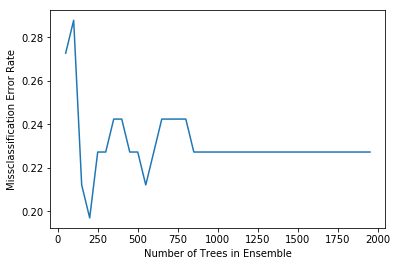

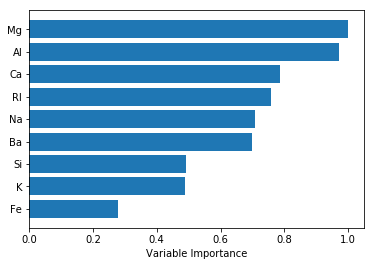

In [5]:
__author__ = 'mike_bowles'

import urllib.request, urllib.error, urllib.parse
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.linear_model import enet_path
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
import numpy

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
for line in data:
    #split on comma
    row = line.decode().strip().split(",")
    xList.append(row)

glassNames = numpy.array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

#Separate attributes and labels
xNum = []
labels = []

for row in xList:
    labels.append(row.pop())
    l = len(row)
    #eliminate ID
    attrRow = [float(row[i]) for i in range(1, l)]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrows = len(xNum)
ncols = len(xNum[1])

#Labels are integers from 1 to 7 with no examples of 4.
#gb requires consecutive integers starting at 0
newLabels = []
labelSet = set(labels)
labelList = list(labelSet)
labelList.sort()
nlabels = len(labelList)
for l in labels:
    index = labelList.index(l)
    newLabels.append(index)

#Class populations:
#old label     new label     num of examples
#1              0               70
#2              1               76
#3              2               17
#5              3               13
#6              4               9
#7              5               29
#
#Drawing 30% test sample may not preserve population proportions

#stratified sampling by labels.
xTemp = [xNum[i] for i in range(nrows) if newLabels[i] == 0]
yTemp = [newLabels[i] for i in range(nrows) if newLabels[i] == 0]
xTrain, xTest, yTrain, yTest = train_test_split(xTemp, yTemp, test_size=0.30, random_state=531)
for iLabel in range(1, len(labelList)):
    #segregate x and y according to labels
    xTemp = [xNum[i] for i in range(nrows) if newLabels[i] == iLabel]
    yTemp = [newLabels[i] for i in range(nrows) if newLabels[i] == iLabel]

    #form train and test sets on segregated subset of examples
    xTrainTemp, xTestTemp, yTrainTemp, yTestTemp = train_test_split(xTemp, yTemp, test_size=0.30, random_state=531)

    #accumulate
    xTrain = numpy.append(xTrain, xTrainTemp, axis=0); xTest = numpy.append(xTest, xTestTemp, axis=0)
    yTrain = numpy.append(yTrain, yTrainTemp, axis=0); yTest = numpy.append(yTest, yTestTemp, axis=0)
    
missCLassError = []
nTreeList = range(50, 2000, 50)
for iTrees in nTreeList:
    depth = None
    maxFeat  = 4 #try tweaking
    glassRFModel = ensemble.RandomForestClassifier(n_estimators=iTrees, max_depth=depth, max_features=maxFeat,
                                                 oob_score=False, random_state=531)

    glassRFModel.fit(xTrain,yTrain)

    #Accumulate auc on test set
    prediction = glassRFModel.predict(xTest)
    correct = accuracy_score(yTest, prediction)

    missCLassError.append(1.0 - correct)

print("Missclassification Error" )
print(missCLassError[-1])

#generate confusion matrix
pList = prediction.tolist()
confusionMat = confusion_matrix(yTest, pList)
print('')
print("Confusion Matrix")
print(confusionMat)



#plot training and test errors vs number of trees in ensemble
plot.plot(nTreeList, missCLassError)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Missclassification Error Rate')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

# Plot feature importance
featureImportance = glassRFModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()

#plot variable importance
idxSorted = numpy.argsort(featureImportance)
barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, glassNames[idxSorted])
plot.xlabel('Variable Importance')
plot.show()


# Printed Output:
# Missclassification Error
# 0.227272727273
#
# Confusion Matrix
# [[17  1  2  0  0  1]
#  [ 2 18  1  2  0  0]
#  [ 3  0  3  0  0  0]
#  [ 0  0  0  4  0  0]
#  [ 0  1  0  0  2  0]
#  [ 0  2  0  0  0  7]]

### rankCorr.py

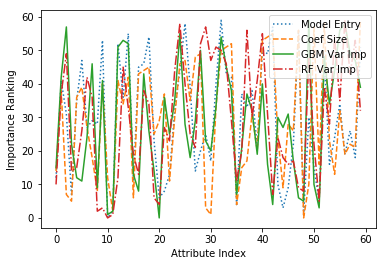

Matrix of Rank Correlations - Full List of Rankings
SpearmanrResult(correlation=array([[1.        , 0.70714087, 0.35576549, 0.29702695],
       [0.70714087, 1.        , 0.22022784, 0.12975827],
       [0.35576549, 0.22022784, 1.        , 0.72258961],
       [0.29702695, 0.12975827, 0.72258961, 1.        ]]), pvalue=array([[0.00000000e+00, 2.69647726e-10, 5.27601232e-03, 2.11866474e-02],
       [2.69647726e-10, 0.00000000e+00, 9.08709853e-02, 3.23081427e-01],
       [5.27601232e-03, 9.08709853e-02, 0.00000000e+00, 7.12684318e-11],
       [2.11866474e-02, 3.23081427e-01, 7.12684318e-11, 0.00000000e+00]]))


In [6]:
__author__ = 'mike_bowles'
import numpy
from scipy.stats import spearmanr
import random
import pylab as plot

enetModelEntry = [10, 48, 11, 44, 35, 51, 20, 3, 21, 45, 43, 15, 0, 22, 27, 50, 53, 30, 58, 56, 28, 39, 46, 19, 54, 29, 57, 6, 8, 7, 49, 2, 23, 37, 55, 4, 13, 36, 38, 26, 31, 1, 34, 33, 24, 16, 17, 5, 52, 41, 40, 59, 12, 9, 18, 14, 47, 42]

enetCoefSize = [48, 30, 11, 29, 35, 3, 15, 2, 8, 44, 49, 22, 10, 54, 0, 36, 51, 37, 7, 56, 39, 58, 57, 53, 43, 19, 46, 6, 45, 20, 23, 38, 55, 31, 13, 26, 4, 21, 1]

gbmVarImp = [20, 10, 11, 51, 42, 48, 47, 35, 16, 8, 50, 5, 4, 15, 19, 0, 41, 46, 26, 39, 30, 36, 3, 29, 6, 22, 18, 44, 25, 27, 43, 45, 38, 31, 53, 23, 21, 37, 34, 59, 40, 9, 1, 17, 54, 33, 7, 58, 52, 57, 28, 12, 14, 13, 32, 24, 55, 2, 56, 49]

rfVarImp = [10, 11, 8, 9, 20, 51, 19, 42, 48, 47, 0, 35, 12, 16, 3, 4, 45, 46, 44, 15, 36, 27, 50, 22, 43, 26, 5, 21, 53, 34, 38, 41, 59, 14, 18, 55, 7, 1, 17, 52, 25, 39, 6, 57, 23, 13, 33, 30, 49, 2, 32, 31, 28, 58, 54, 40, 37, 29, 24, 56]


#find missing values and add to end of list
missing = [i for i in range(60) if i not in enetModelEntry]
enetModelEntry = enetModelEntry + missing

missing = [i for i in range(60) if i not in enetCoefSize]
enetCoefSize = enetCoefSize + missing

modelEntry = numpy.argsort(enetModelEntry)
coefSize = numpy.argsort(enetCoefSize)
gbmImp = numpy.argsort(gbmVarImp)
rfImp = numpy.argsort(rfVarImp)

#plot the rankings for each attributes using each of these methods
plot.figure()
xAxisPts = range(60)
plot.plot(xAxisPts, modelEntry, label='Model Entry', linestyle=":")
plot.plot(xAxisPts, coefSize, label='Coef Size', linestyle="--")
plot.plot(xAxisPts, gbmImp, label='GBM Var Imp', linestyle="-")
plot.plot(xAxisPts, rfImp, label='RF Var Imp', linestyle="-.")

plot.legend(loc='upper right')
plot.xlabel('Attribute Index')
plot.ylabel('Importance Ranking')
plot.show()

#stack the ranking vectors into a matrix and calculate the spearman rank correlations between methods
rankMat = numpy.column_stack((modelEntry, coefSize, gbmImp, rfImp))

corrMat = spearmanr(rankMat, axis=0)

print("Matrix of Rank Correlations - Full List of Rankings")
print(corrMat)

# Printed Output:
#
# Matrix of Rank Correlations - Full List of Rankings
# (array([[ 1.        ,  0.70714087,  0.35576549,  0.29702695],
#        [ 0.70714087,  1.        ,  0.22022784,  0.12975827],
#        [ 0.35576549,  0.22022784,  1.        ,  0.72258961],
#        [ 0.29702695,  0.12975827,  0.72258961,  1.        ]]),
#
#  array([[  0.00000000e+00,   2.69647726e-10,   5.27601232e-03, 2.11866474e-02],
#        [  2.69647726e-10,   0.00000000e+00,   9.08709853e-02, 3.23081427e-01],
#        [  5.27601232e-03,   9.08709853e-02,   0.00000000e+00, 7.12684318e-11],
#        [  2.11866474e-02,   3.23081427e-01,   7.12684318e-11, 0.00000000e+00]]))

### rocksVMinesGBM.py

Best AUC
0.9533468559837729
Number of Trees for Best AUC
1037


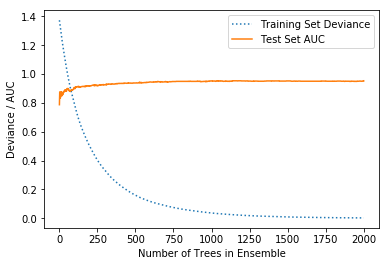

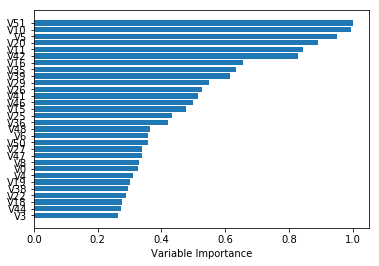

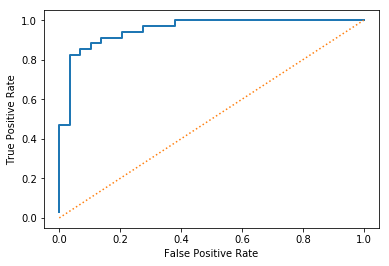


Confusion Matrices for Different Threshold Values

Threshold Value =    1.678409422418272
TP =  0.4444444444444444 FP =  0.031746031746031744
FN =  0.09523809523809523 TN =  0.42857142857142855

Threshold Value =    1.3265146567806227
TP =  0.47619047619047616 FP =  0.06349206349206349
FN =  0.06349206349206349 TN =  0.3968253968253968

Threshold Value =    0.6800319785640546
TP =  0.5079365079365079 FP =  0.12698412698412698
FN =  0.031746031746031744 TN =  0.3333333333333333


In [7]:
__author__ = 'mike_bowles'

import urllib.request, urllib.error, urllib.parse
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy

#read data from uci data repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urllib.request.urlopen(target_url)


#arrange data into list for labels and list of lists for attributes
xList = []


for line in data:
    #split on comma
    row = line.decode().strip().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1)
    else:
        labels.append(0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrows = len(xNum)
ncols = len(xNum[1])

#form x and y into numpy arrays and make up column names
X = numpy.array(xNum)
y = numpy.array(labels)
rockVMinesNames = numpy.array(['V' + str(i) for i in range(ncols)])

#break into training and test sets.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

#instantiate model
nEst = 2000
depth = 3
learnRate = 0.007
maxFeatures = 20
rockVMinesGBMModel = ensemble.GradientBoostingClassifier(n_estimators=nEst, max_depth=depth,
                                                         learning_rate=learnRate,
                                                         max_features=maxFeatures)
#train
rockVMinesGBMModel.fit(xTrain, yTrain)

# compute auc on test set as function of ensemble size
auc = []
aucBest = 0.0
predictions = rockVMinesGBMModel.staged_decision_function(xTest)
for p in predictions:
    aucCalc = roc_auc_score(yTest, p)
    auc.append(aucCalc)

    #capture best predictions
    if aucCalc > aucBest:
        aucBest = aucCalc
        pBest = p

idxBest = auc.index(max(auc))

#print best values
print("Best AUC" )
print(auc[idxBest])
print("Number of Trees for Best AUC")
print(idxBest)

#plot training deviance and test auc's vs number of trees in ensemble
plot.figure()
plot.plot(range(1, nEst + 1), rockVMinesGBMModel.train_score_, label='Training Set Deviance', linestyle=":")
plot.plot(range(1, nEst + 1), auc, label='Test Set AUC')
plot.legend(loc='upper right')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Deviance / AUC')
plot.show()

# Plot feature importance
featureImportance = rockVMinesGBMModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()

#plot importance of top 30
idxSorted = numpy.argsort(featureImportance)[30:60]

barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, rockVMinesNames[idxSorted])
plot.xlabel('Variable Importance')
plot.show()

#pick some threshold values and calc confusion matrix for best predictions
#notice that GBM predictions don't fall in range of (0, 1)

#plot best version of ROC curve
fpr, tpr, thresh = roc_curve(yTest, list(pBest))
ctClass = [i*0.01 for i in range(101)]

plot.plot(fpr, tpr, linewidth=2)
plot.plot(ctClass, ctClass, linestyle=':')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.show()

#pick some threshold values and calc confusion matrix for best predictions
#notice that GBM predictions don't fall in range of (0, 1)
#pick threshold values at 25th, 50th and 75th percentiles
idx25 = int(len(thresh) * 0.25)
idx50 = int(len(thresh) * 0.50)
idx75 = int(len(thresh) * 0.75)

#calculate total points, total positives and total negatives
totalPts = len(yTest)
P = sum(yTest)
N = totalPts - P

print('')
print('Confusion Matrices for Different Threshold Values')

#25th
TP = tpr[idx25] * P; FN = P - TP; FP = fpr[idx25] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx25])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)

#50th
TP = tpr[idx50] * P; FN = P - TP; FP = fpr[idx50] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx50])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)

#75th
TP = tpr[idx75] * P; FN = P - TP; FP = fpr[idx75] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx75])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)


# Printed Output:
#
# Best AUC
# 0.936105476673
# Number of Trees for Best AUC
# 1989
#
# Confusion Matrices for Different Threshold Values
#
# ('Threshold Value =   ', 6.2941249291909935)
# ('TP = ', 0.23809523809523808, 'FP = ', 0.015873015873015872)
# ('FN = ', 0.30158730158730157, 'TN = ', 0.44444444444444442)
#
# ('Threshold Value =   ', 2.2710265370949441)
# ('TP = ', 0.44444444444444442, 'FP = ', 0.063492063492063489)
# ('FN = ', 0.095238095238095233, 'TN = ', 0.3968253968253968)
#
# ('Threshold Value =   ', -3.0947902666953317)
# ('TP = ', 0.53968253968253965, 'FP = ', 0.22222222222222221)
# ('FN = ', 0.0, 'TN = ', 0.23809523809523808)
#
#
# Printed Output with max_features = 20 (Random Forest base learners):
#
# Best AUC
# 0.956389452333
# Number of Trees for Best AUC
# 1426
#
# Confusion Matrices for Different Threshold Values
#
# ('Threshold Value =   ', 5.8332200248698536)
# ('TP = ', 0.23809523809523808, 'FP = ', 0.015873015873015872)
# ('FN = ', 0.30158730158730157, 'TN = ', 0.44444444444444442)
#
# ('Threshold Value =   ', 2.0281780133610567)
# ('TP = ', 0.47619047619047616, 'FP = ', 0.031746031746031744)
# ('FN = ', 0.063492063492063489, 'TN = ', 0.42857142857142855)
#
# ('Threshold Value =   ', -1.2965629080181333)
# ('TP = ', 0.53968253968253965, 'FP = ', 0.22222222222222221)
# ('FN = ', 0.0, 'TN = ', 0.23809523809523808)

### rocksVMinesRF.py

AUC
0.9457403651115619


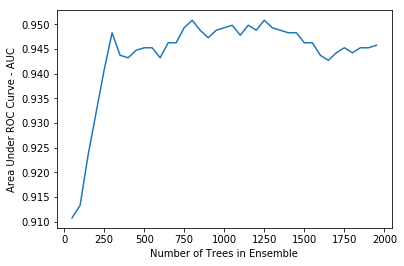

[10 11  8 20  9 51 48 19 42 47  0 12 35 46  3 16 44  4 45 36 27 26 15 43
 50  5 22 18 38 41 34 17 21 14 25  1 53  7  6 13 39 23 52 30 54 31 24 33
 32  2 28 37 49 29 57 58 40 59 55 56]


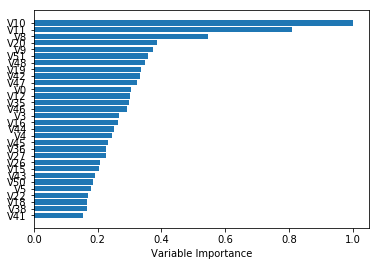

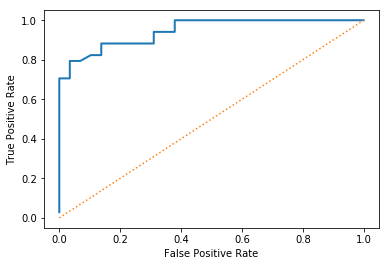


Confusion Matrices for Different Threshold Values

Threshold Value =    0.6369230769230769
TP =  0.42857142857142855 FP =  0.015873015873015872
FN =  0.1111111111111111 TN =  0.4444444444444444

Threshold Value =    0.6251282051282051
TP =  0.4444444444444444 FP =  0.06349206349206349
FN =  0.09523809523809523 TN =  0.3968253968253968

Threshold Value =    0.5574358974358974
TP =  0.5079365079365079 FP =  0.14285714285714285
FN =  0.031746031746031744 TN =  0.31746031746031744


In [8]:
__author__ = 'mike_bowles'

import urllib.request, urllib.error, urllib.parse
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy

#read data from uci data repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []

for line in data:
    #split on comma
    row = line.decode().strip().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1)
    else:
        labels.append(0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrows = len(xNum)
ncols = len(xNum[1])

#form x and y into numpy arrays and make up column names
X = numpy.array(xNum)
y = numpy.array(labels)
rocksVMinesNames = numpy.array(['V' + str(i) for i in range(ncols)])

#break into training and test sets.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

auc = []
nTreeList = range(50, 2000, 50)
for iTrees in nTreeList:
    depth = None
    maxFeat  = 8 #try tweaking
    rocksVMinesRFModel = ensemble.RandomForestClassifier(n_estimators=iTrees, max_depth=depth, max_features=maxFeat,
                                                 oob_score=False, random_state=531)

    rocksVMinesRFModel.fit(xTrain,yTrain)

    #Accumulate auc on test set
    prediction = rocksVMinesRFModel.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)

print("AUC" )
print(auc[-1])


#plot training and test errors vs number of trees in ensemble
plot.plot(nTreeList, auc)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Area Under ROC Curve - AUC')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

# Plot feature importance
featureImportance = rocksVMinesRFModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()

#plot importance of top 30
idxSorted = numpy.argsort(featureImportance)[30:60]
idxTemp = numpy.argsort(featureImportance)[::-1]
print(idxTemp)
barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, rocksVMinesNames[idxSorted])
plot.xlabel('Variable Importance')
plot.show()

#plot best version of ROC curve
fpr, tpr, thresh = roc_curve(yTest, list(prediction[:,1:2]))
ctClass = [i*0.01 for i in range(101)]

plot.plot(fpr, tpr, linewidth=2)
plot.plot(ctClass, ctClass, linestyle=':')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.show()

#pick some threshold values and calc confusion matrix for best predictions
#notice that GBM predictions don't fall in range of (0, 1)
#pick threshold values at 25th, 50th and 75th percentiles
idx25 = int(len(thresh) * 0.25)
idx50 = int(len(thresh) * 0.50)
idx75 = int(len(thresh) * 0.75)

#calculate total points, total positives and total negatives
totalPts = len(yTest)
P = sum(yTest)
N = totalPts - P

print('')
print('Confusion Matrices for Different Threshold Values')

#25th
TP = tpr[idx25] * P; FN = P - TP; FP = fpr[idx25] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx25])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)

#50th
TP = tpr[idx50] * P; FN = P - TP; FP = fpr[idx50] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx50])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)

#75th
TP = tpr[idx75] * P; FN = P - TP; FP = fpr[idx75] * N; TN = N - FP
print('')
print('Threshold Value =   ', thresh[idx75])
print('TP = ', TP/totalPts, 'FP = ', FP/totalPts)
print('FN = ', FN/totalPts, 'TN = ', TN/totalPts)


# Printed Output:
#
# AUC
# 0.950304259635
#
# Confusion Matrices for Different Threshold Values
#
# ('Threshold Value =   ', 0.76051282051282054)
# ('TP = ', 0.25396825396825395, 'FP = ', 0.0)
# ('FN = ', 0.2857142857142857, 'TN = ', 0.46031746031746029)
#
# ('Threshold Value =   ', 0.62461538461538457)
# ('TP = ', 0.46031746031746029, 'FP = ', 0.047619047619047616)
# ('FN = ', 0.079365079365079361, 'TN = ', 0.41269841269841268)
#
# ('Threshold Value =   ', 0.46564102564102566)
# ('TP = ', 0.53968253968253965, 'FP = ', 0.22222222222222221)
# ('FN = ', 0.0, 'TN = ', 0.23809523809523808)

### wineBagging.py

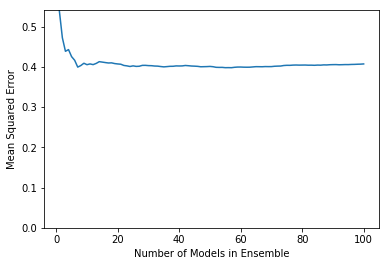

Minimum MSE
0.39778025634233677


In [9]:
__author__ = 'mike-bowles'

import urllib.request, urllib.error, urllib.parse
import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random


# Read wine quality data from UCI website
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

nrows = len(xList)
ncols = len(xList[0])


#take fixed test set 30% of sample
nSample = int(nrows * 0.30)
idxTest = random.sample(range(nrows), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nrows) if not(idx in idxTest)]

#Define test and training attribute and label sets
xTrain = [xList[r] for r in idxTrain]
xTest = [xList[r] for r in idxTest]
yTrain = [labels[r] for r in idxTrain]
yTest = [labels[r] for r in idxTest]

#train a series of models on random subsets of the training data
#collect the models in a list and check error of composite as list grows

#maximum number of models to generate
numTreesMax = 100

#tree depth - typically at the high end
treeDepth = 5

#initialize a list to hold models
modelList = []
predList = []

#number of samples to draw for stochastic bagging
bagFract = 0.5
nBagSamples = int(len(xTrain) * bagFract)

for iTrees in range(numTreesMax):
    idxBag = []
    for i in range(nBagSamples):
        idxBag.append(random.choice(range(len(xTrain))))
    xTrainBag = [xTrain[i] for i in idxBag]
    yTrainBag = [yTrain[i] for i in idxBag]

    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrainBag, yTrainBag)

    #make prediction with latest model and add to list of predictions
    latestPrediction = modelList[-1].predict(xTest)
    predList.append(list(latestPrediction))


#build cumulative prediction from first "n" models
mse = []
allPredictions = []
for iModels in range(len(modelList)):

    #average first "iModels" of the predictions
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)])/(iModels + 1))

    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors]) / len(yTest))

nModels = [i + 1 for i in range(len(modelList))]

plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Models in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()

print('Minimum MSE')
print(min(mse))


#With treeDepth = 5
#     bagFract = 0.5
#Minimum MSE
#0.429310223079

#With treeDepth = 8
#     bagFract = 0.5
#Minimum MSE
#0.395838627928

#With treeDepth = 10
#     bagFract = 1.0
#Minimum MSE
#0.313120547589

### wineGBM.py

MSE
0.31979472576975626
1046


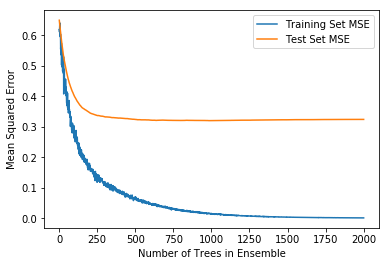

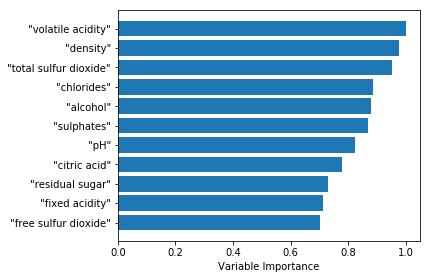

In [10]:
import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

# Read wine quality data from UCI website
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

nrows = len(xList)
ncols = len(xList[0])

X = numpy.array(xList)
y = numpy.array(labels)
wineNames = numpy.array(names)

#take fixed holdout set 30% of data rows
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

# Train gradient boosting model to minimize mean squared error
nEst = 2000
depth = 7
learnRate = 0.01
subSamp = 0.5
wineGBMModel = ensemble.GradientBoostingRegressor(n_estimators=nEst,
                                                  max_depth=depth,
                                                  learning_rate=learnRate,
                                                  subsample = subSamp,
                                                  loss='ls')

wineGBMModel.fit(xTrain, yTrain)

# compute mse on test set
msError = []
predictions = wineGBMModel.staged_predict(xTest)
for p in predictions:
    msError.append(mean_squared_error(yTest, p))

print("MSE" )
print(min(msError))
print(msError.index(min(msError)))

#plot training and test errors vs number of trees in ensemble
plot.figure()
plot.plot(range(1, nEst + 1), wineGBMModel.train_score_, label='Training Set MSE')
plot.plot(range(1, nEst + 1), msError, label='Test Set MSE')
plot.legend(loc='upper right')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
plot.show()

# Plot feature importance
featureImportance = wineGBMModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()
idxSorted = numpy.argsort(featureImportance)
barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, wineNames[idxSorted])
plot.xlabel('Variable Importance')
plot.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plot.show()


# Printed Output:
# for:
#nEst = 2000
#depth = 7
#learnRate = 0.01
#subSamp = 0.5
#
# MSE
# 0.313361215728
# 840

### wineRF.py

MSE
0.3184462723865057


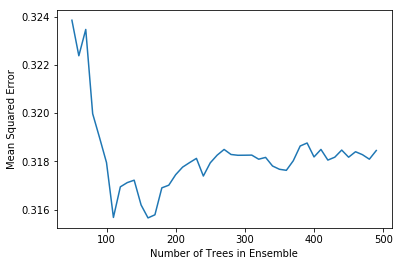

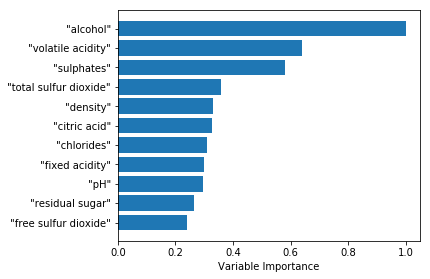

In [11]:
import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot


# Read wine quality data from UCI website
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

nrows = len(xList)
ncols = len(xList[0])

X = numpy.array(xList)
y = numpy.array(labels)
wineNames = numpy.array(names)

#take fixed holdout set 30% of data rows
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

#train random forest at a range of ensemble sizes in order to see how the mse changes
mseOos = []
nTreeList = range(50, 500, 10)
for iTrees in nTreeList:
    depth = None
    maxFeat  = 4 #try tweaking
    wineRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees, max_depth=depth, max_features=maxFeat,
                                                 oob_score=False, random_state=531)

    wineRFModel.fit(xTrain,yTrain)

    #Accumulate mse on test set
    prediction = wineRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))


print("MSE" )
print(mseOos[-1])


#plot training and test errors vs number of trees in ensemble
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

# Plot feature importance
featureImportance = wineRFModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()
sorted_idx = numpy.argsort(featureImportance)
barPos = numpy.arange(sorted_idx.shape[0]) + .5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, wineNames[sorted_idx])
plot.xlabel('Variable Importance')
plot.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plot.show()

#printed output
#MSE
#0.314125711509